✅ Variables seleccionadas: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
📊 Matriz de Confusión:
[[715 318]
 [ 71 303]]

📋 Clasification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407

🔥 ROC AUC: 0.829


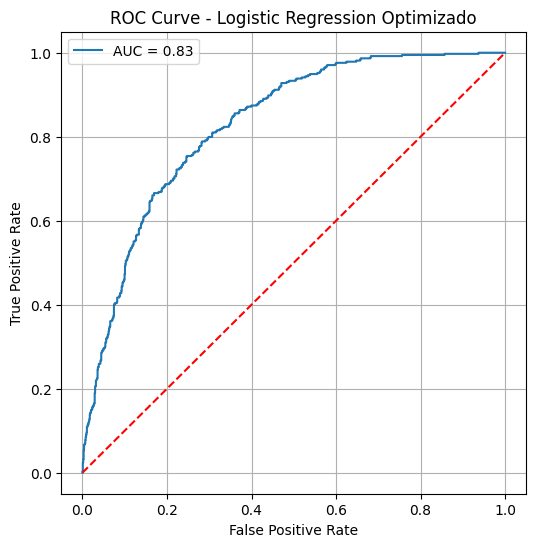

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv") 
df = df.dropna()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dropna(inplace=True)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_classif, k=15)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]
print("✅ Variables seleccionadas:", selected_features.tolist())

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)
y_proba = model.predict_proba(X_test_sel)[:,1]

print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Clasification Report:")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_proba)
print(f"🔥 ROC AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression Optimizado")
plt.legend()
plt.grid(True)
plt.show()
